# Install and Load Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

<Figure size 640x480 with 0 Axes>

# Consumer Behavior and Shopping

## Overview

The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

------
**Columns:**
* Customer ID:A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

* Age: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

* Gender: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

* Item Purchased: The specific product or item selected by the customer during the transaction.

* Category: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

* Purchase Amount (USD): The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

* Location: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

* Size: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

* Color: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

* Season: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

* Review Rating: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

* Subscription Status: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

* Shipping Type: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

* Discount Applied: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

* Promo Code Used: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

* Previous Purchases: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

* Payment Method: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

* Frequency of Purchases: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

In [ ]:
df=pd.read_csv('/content/shopping_behavior_updated.csv')

## Understanding the dataset

### Dataset Information

In [ ]:
#display the top row
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#display the last row
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
#get the size of the dataset
df.shape

(3900, 18)

the dataset has 3900 rows and 18 columns

In [ ]:
#get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

the dataset contains 18 columns, with 1 column of float type, 4 columns of integer type and 13 columns of object type

### Check Unique Value

check unique value from object column

In [ ]:
#check unique value from Gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

terdapat 2 gender

In [ ]:
#check unique value from Item Purchased column
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

terdapat 25 produk

In [ ]:
#check unique value from Category column
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

terdapat 4 kategori produk

In [ ]:
#check unique value from Location column
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

terdapat 50 lokasi pembelian

In [ ]:
#check unique value from Size column
df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

terdapat 4 ukuran produk

In [ ]:
#check unique value from Color column
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

terdapat 25 pilihan warna produk

In [ ]:
#check unique value from Season column
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

terdapat 4 musim

In [ ]:
#check unqiue value from Subscription Status column
df['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

terdapat 2 status berlangganan

In [ ]:
#check unqiue value from Shipping Type column
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

terdapat 6 tipe pengiriman

In [ ]:
#check unqiue value from Discount Applied column
df['Discount Applied'].unique()

array(['Yes', 'No'], dtype=object)

terdapat 2 pilihan dalam menggunakan diskon pembelanjaan

In [ ]:
#check unqiue value from Promo Code Used column
df['Promo Code Used'].unique()

array(['Yes', 'No'], dtype=object)

terdapat 2 pilihan dalam menggunakan kode promo

In [ ]:
#check unique value from Payment Method column
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

terdapat 6 pilihan metode pembayaran

In [ ]:
#check unique value from Frequency of Purchases column
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

terdapat 7 kategori frekuensi pembelian

## Data Preprocessing

### Check Missing Value

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


there is no missing value in this dataset

### Check Duplicate Data

In [ ]:
#to know if there is duplicated data
print("total duplicated values: ", df.duplicated().sum())

total duplicated values:  0


there is no duplicated values in this dataset

### Check Outlier

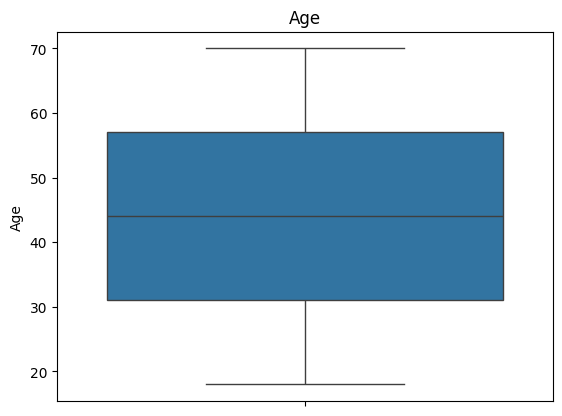

In [ ]:
sns.boxplot(df['Age'])
plt.title('Age')
plt.show()

there is no outlier found in age

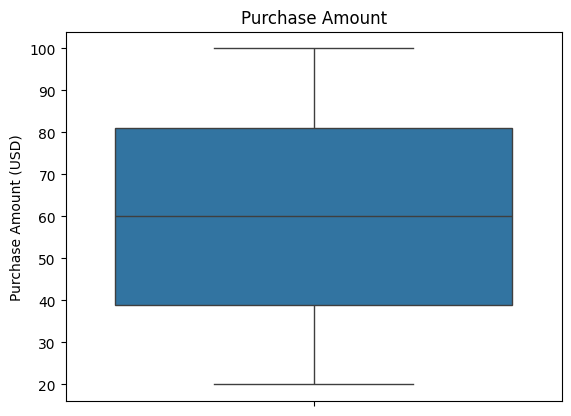

In [ ]:
sns.boxplot(df['Purchase Amount (USD)'])
plt.title('Purchase Amount')
plt.show()

there is no outlier in purchase amount

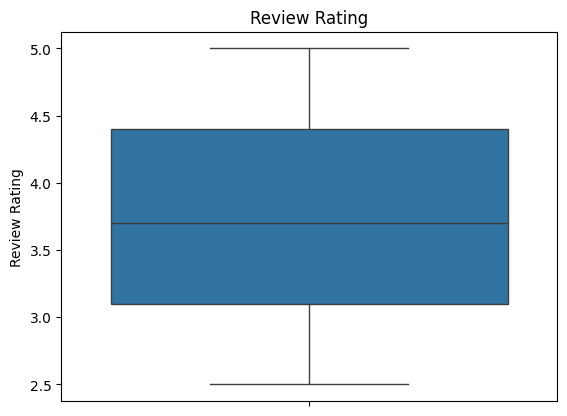

In [ ]:
sns.boxplot(df['Review Rating'])
plt.title('Review Rating')
plt.show()

there is no outlier in review rating

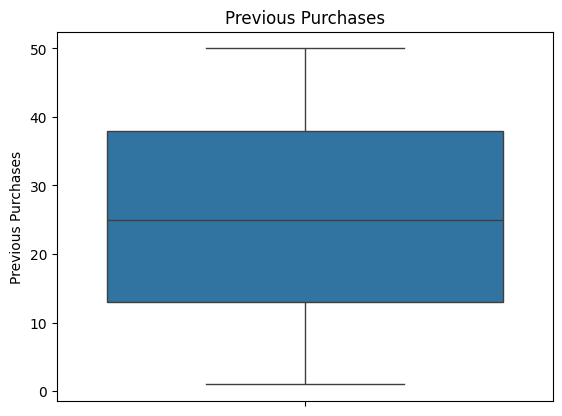

In [ ]:
sns.boxplot(df['Previous Purchases'])
plt.title('Previous Purchases')
plt.show()

there is no outlier in previous purchases

### Handling Abnormal Data

In [ ]:
#Check to see if any products are placed in the wrong category.
df[(df['Item Purchased'] == 'Skirt') & (df['Category'] == 'Accessories')]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


tidak ada produk yg ditempatkan tidak sesuai dengan kategori produknya

In [ ]:
#Check to see if there are any males who buy skirts (women's clothing).
df[(df['Gender'] == 'Male') & (df['Item Purchased'] == 'Skirt')]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
15,16,64,Male,Skirt,Clothing,81,Rhode Island,M,Teal,Winter,2.8,Yes,Store Pickup,Yes,Yes,8,PayPal,Monthly
51,52,59,Male,Skirt,Clothing,59,Vermont,XL,Gray,Winter,4.7,Yes,2-Day Shipping,Yes,Yes,7,Credit Card,Quarterly
53,54,29,Male,Skirt,Clothing,24,Mississippi,S,Peach,Winter,3.9,Yes,Next Day Air,Yes,Yes,35,Credit Card,Weekly
78,79,50,Male,Skirt,Clothing,91,Nebraska,M,Maroon,Spring,4.7,Yes,Free Shipping,Yes,Yes,50,Venmo,Fortnightly
94,95,58,Male,Skirt,Clothing,76,Nevada,S,Silver,Spring,4.6,Yes,Free Shipping,Yes,Yes,28,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2595,59,Male,Skirt,Clothing,81,Montana,L,Indigo,Fall,3.6,No,Free Shipping,No,No,25,Cash,Every 3 Months
2625,2626,30,Male,Skirt,Clothing,51,Colorado,L,Cyan,Summer,2.7,No,Standard,No,No,31,Credit Card,Weekly
2630,2631,29,Male,Skirt,Clothing,82,Maine,S,Pink,Spring,4.2,No,Free Shipping,No,No,20,Cash,Quarterly
2631,2632,53,Male,Skirt,Clothing,44,Connecticut,S,Violet,Summer,2.7,No,Express,No,No,3,Cash,Weekly


terdapat 109 pelanggan pria membeli produk wanita seperti skirt

In [ ]:
#Check to see if there are any men who buy dress (women's clothing).
df[(df['Gender'] == 'Male') & (df['Item Purchased'] == 'Dress')]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
13,14,65,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
17,18,53,Male,Dress,Clothing,38,Mississippi,XL,Lavender,Winter,4.7,Yes,2-Day Shipping,Yes,Yes,36,Venmo,Quarterly
29,30,31,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
31,32,33,Male,Dress,Clothing,79,West Virginia,L,Brown,Winter,4.7,Yes,Store Pickup,Yes,Yes,45,Venmo,Monthly
38,39,29,Male,Dress,Clothing,37,Florida,M,Red,Winter,3.7,Yes,2-Day Shipping,Yes,Yes,44,Venmo,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,2582,57,Male,Dress,Clothing,81,Wyoming,M,Gold,Winter,4.7,No,Express,No,No,48,Credit Card,Monthly
2582,2583,19,Male,Dress,Clothing,98,South Dakota,S,Indigo,Fall,3.6,No,2-Day Shipping,No,No,4,Venmo,Every 3 Months
2601,2602,61,Male,Dress,Clothing,33,Mississippi,L,Orange,Winter,2.9,No,Store Pickup,No,No,43,Cash,Monthly
2603,2604,69,Male,Dress,Clothing,58,Washington,M,Teal,Spring,2.7,No,2-Day Shipping,No,No,8,Cash,Annually


Terdapat 114 pelanggan pria yang membeli produk yang biasa digunakan wanita yaitu dress

In [ ]:
#filter df for purchases of dresses and skirts
dress_skirt_df = df[df['Item Purchased'].isin(['Dress', 'Skirt'])]

#group by gender and count the number of purchases
gender_based_purchases = dress_skirt_df['Gender'].value_counts().reset_index()
gender_based_purchases.columns = ['Gender', 'Count']

gender_based_purchases

,Gender,Count
0,Male,223
1,Female,101


Terindikasi adanya kesalahan input pada gender customer karena berdasarkan analisis, terdapat beberapa keanehan yaitu banyak pelanggan pria yang membeli produk yang biasa digunakan wanita yaitu dress dan skirt. Maka perlu dilakukan perubahan gender customer dari male menjadi female dan sebaliknya.

In [ ]:
# Change gender from male to female
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Male' else 'Male')

### Column Preprocessing

In [ ]:
# change the data type for customer ID from integer type to object type
df['Customer ID'] = df['Customer ID'].astype('str')

In [ ]:
# rename the column for better understanding
df = df.rename(columns={
   'Category' : 'Product Category'
})

In [ ]:
#create new column 'Age Group'
df['Age Group'] = pd.cut(
    df['Age'],
    [10, 20, 30, 40, 50, 60, 70],
    labels=['10-20', '21-30', '31-40', '41-50', '51-60', '61-70']
)

In [ ]:
#create function to categorize shipping type to Online or Offline type
def categorize_shipping_type(shipping_type):
  if shipping_type in ['Express', 'Free Shipping', 'Next Day Air', 'Standard', '2-Day Shipping']:
    return 'Online'
  elif shipping_type == 'Store Pickup':
    return 'Offline'

#create a new column with the categorized shipping type
df['Shipping Mode'] = df['Shipping Type'].apply(categorize_shipping_type)

In [ ]:
# drop column that unused
df = df.drop(columns=['Size', 'Color', 'Season', 'Discount Applied'])

## Final Dataset

In [ ]:
# display the top row of final dataset
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Product Category,Purchase Amount (USD),Location,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Shipping Mode
0,1,55,Female,Blouse,Clothing,53,Kentucky,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,51-60,Online
1,2,19,Female,Sweater,Clothing,64,Maine,3.1,Yes,Express,Yes,2,Cash,Fortnightly,10-20,Online
2,3,50,Female,Jeans,Clothing,73,Massachusetts,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,41-50,Online
3,4,21,Female,Sandals,Footwear,90,Rhode Island,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,21-30,Online
4,5,45,Female,Blouse,Clothing,49,Oregon,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,41-50,Online
5,6,46,Female,Sneakers,Footwear,20,Wyoming,2.9,Yes,Standard,Yes,14,Venmo,Weekly,41-50,Online
6,7,63,Female,Shirt,Clothing,85,Montana,3.2,Yes,Free Shipping,Yes,49,Cash,Quarterly,61-70,Online
7,8,27,Female,Shorts,Clothing,34,Louisiana,3.2,Yes,Free Shipping,Yes,19,Credit Card,Weekly,21-30,Online
8,9,26,Female,Coat,Outerwear,97,West Virginia,2.6,Yes,Express,Yes,8,Venmo,Annually,21-30,Online
9,10,57,Female,Handbag,Accessories,31,Missouri,4.8,Yes,2-Day Shipping,Yes,4,Cash,Quarterly,51-60,Online


In [ ]:
# display the last row of final dataset
df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Product Category,Purchase Amount (USD),Location,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Shipping Mode
3895,3896,40,Male,Hoodie,Clothing,28,Virginia,4.2,No,2-Day Shipping,No,32,Venmo,Weekly,31-40,Online
3896,3897,52,Male,Backpack,Accessories,49,Iowa,4.5,No,Store Pickup,No,41,Bank Transfer,Bi-Weekly,51-60,Offline
3897,3898,46,Male,Belt,Accessories,33,New Jersey,2.9,No,Standard,No,24,Venmo,Quarterly,41-50,Online
3898,3899,44,Male,Shoes,Footwear,77,Minnesota,3.8,No,Express,No,24,Venmo,Weekly,41-50,Online
3899,3900,52,Male,Handbag,Accessories,81,California,3.1,No,Store Pickup,No,33,Venmo,Quarterly,51-60,Offline


In [ ]:
# get the size of the final dataset
df.shape

(3900, 16)

the final dataset contain 3900 rows and 16 columns

In [ ]:
# get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   object  
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Product Category        3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Review Rating           3900 non-null   float64 
 8   Subscription Status     3900 non-null   object  
 9   Shipping Type           3900 non-null   object  
 10  Promo Code Used         3900 non-null   object  
 11  Previous Purchases      3900 non-null   int64   
 12  Payment Method          3900 non-null   object  
 13  Frequency of Purchases  3900 non-null   object  
 14  Age Group               

the dataset contains 16 columns, with 1 column of category type, 1 column of float type, 3 columns of integer type and 11 columns of object type

### Descriptive Statistic

In [ ]:
#get summary statistics of the dataset
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


* rata-rata umur pelanggan yaitu 44 tahun, paling muda usia 18 tahun dan yang paling tua berumur 70 tahun
* rata-rata jumlah pembeliannya 59 USD, posisi terendah dengan 20 USD dan yang tertinggi yaitu 100 USD
* rata-rata rating pelanggan thd barang yg dibeli yaitu 3,7 , yang terendah dengan rating 2,5 dan yang tertinggi dengan rating 5
* rata-rata jumlah pembelian pelanggan yaitu 25 kali, yang terendah yaitu 1 kali pembelian dan yang tertinggi yaitu 50 kali pembelian

In [ ]:
df.describe(include='object')

,Customer ID,Gender,Item Purchased,Product Category,Location,Subscription Status,Shipping Type,Promo Code Used,Payment Method,Frequency of Purchases,Shipping Mode
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,3900,2,25,4,50,2,6,2,6,7,2
top,1,Female,Blouse,Clothing,Montana,No,Free Shipping,No,PayPal,Every 3 Months,Online
freq,1,2652,171,1737,96,2847,675,2223,677,584,3250


* pembeli lebih banyak berjenis kelamin **wanita / female**
* lokasi pembeli lebih banyak berasal dari daerah **Montana**
* **Blouse** menjadi produk yang paling banyak dibeli yaitu sebesar 171 unit
* **Clothing** menjadi kategori yang paling banyak dibeli yaitu sebesar 1737 unit produk dari kategori ini
* Mode pengiriman yang paling banyak digunakan yaitu **Online** dengan tipe pengiriman **Free Shipping**
* Pelanggan lebih banyak yang **tidak menggunakan kode promo**
* pelanggan lebih banyak melakukan pembelian produk setiap 3 bulan sekali / **every 3 months**
* Pelanggan lebih banyak yang memilih untuk **tidak berlangganan**
* metode pembayaran yang paling banyak digunakan yaitu **PayPal**

## Deep Dive EDA

### Customer Distribution

#### Gender Distribution

In [ ]:
gender_counts = df['Gender'].value_counts()

gender_counts

,count
Gender,
Female,2652
Male,1248


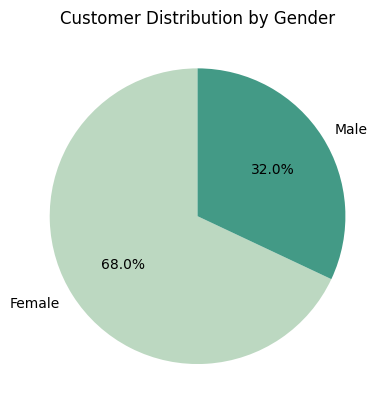

In [ ]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Customer Distribution by Gender')
plt.show()

berdasarkan data, **didominasi oleh pelanggan wanita** sebanyak 68% atau 2652 orang

#### Age Distribution

In [ ]:
age_counts = df['Age'].value_counts()

age_counts

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


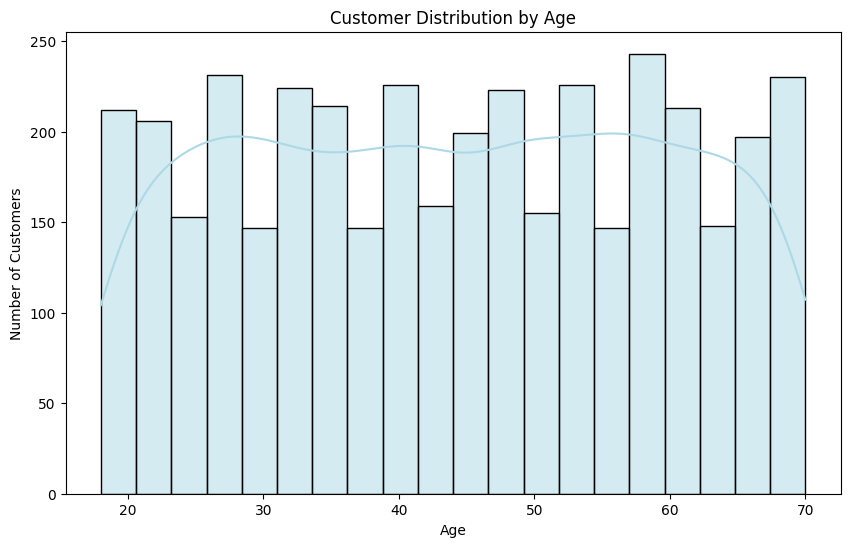

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, color='lightblue', bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Age')
plt.show()

rata-rata umur pelanggan yaitu 44 tahun, dengan yg termuda berumur 18 tahun dan yg tertua berumur 70 tahun

#### Age Group Distribution

In [ ]:
df['Age Group'].value_counts()

,count
Age Group,
51-60,753
41-50,750
21-30,737
31-40,725
61-70,723
10-20,212


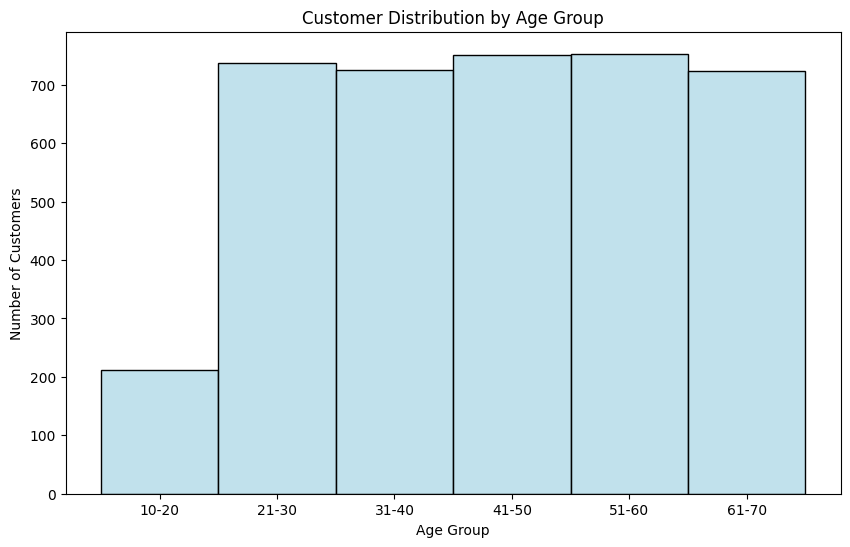

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age Group'], color='lightblue', bins=20)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Age Group')
plt.show()

berdasarkan data, pelanggan lebih banyak berasal dari kalangan usia 51-60 tahun, lalu diikuti usia 41-50 tahun

#### Age Group and Gender Distribution

In [ ]:
age_group_gen_dist = pd.pivot_table(
    data=df,
    index=['Age Group', 'Gender'],
    values='Customer ID',
    aggfunc='count'
).reset_index()

age_group_gen_dist

,Age Group,Gender,Customer ID
0,10-20,Female,153
1,10-20,Male,59
2,21-30,Female,501
3,21-30,Male,236
4,31-40,Female,488
5,31-40,Male,237
6,41-50,Female,492
7,41-50,Male,258
8,51-60,Female,523
9,51-60,Male,230


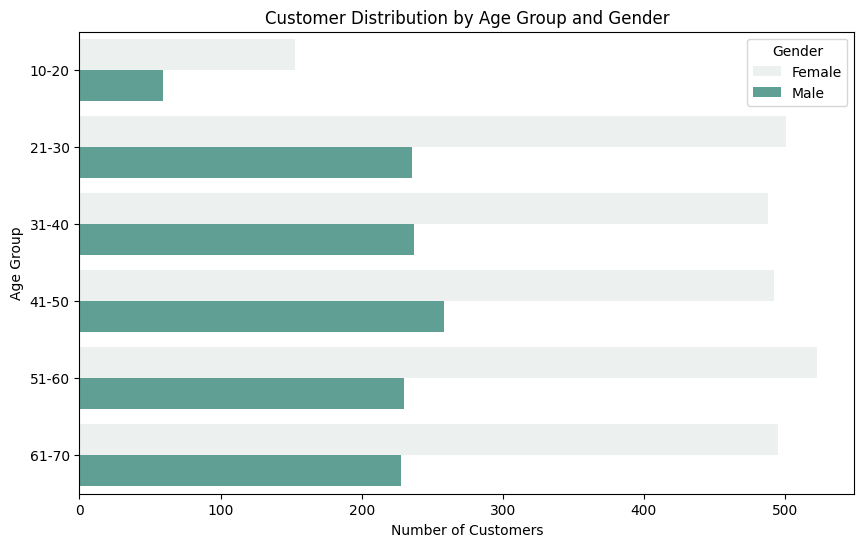

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=age_group_gen_dist, x='Customer ID', y='Age Group', hue='Gender', palette='light:#5A9')
plt.title('Customer Distribution by Age Group and Gender')
plt.xlabel('Number of Customers')
plt.ylabel('Age Group')
plt.show()

Pelanggan lebih banyak berasal dari kategori usia 51-60thn, lalu diikuti usia 21-30 thn dan 61-70 tahun. Dari semua kategori umur, didominasi oleh pelanggan berjenis kelamin wanita

### Product Category Distribution

In [ ]:
prod_cat_counts = df['Product Category'].value_counts()

prod_cat_counts

,count
Product Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


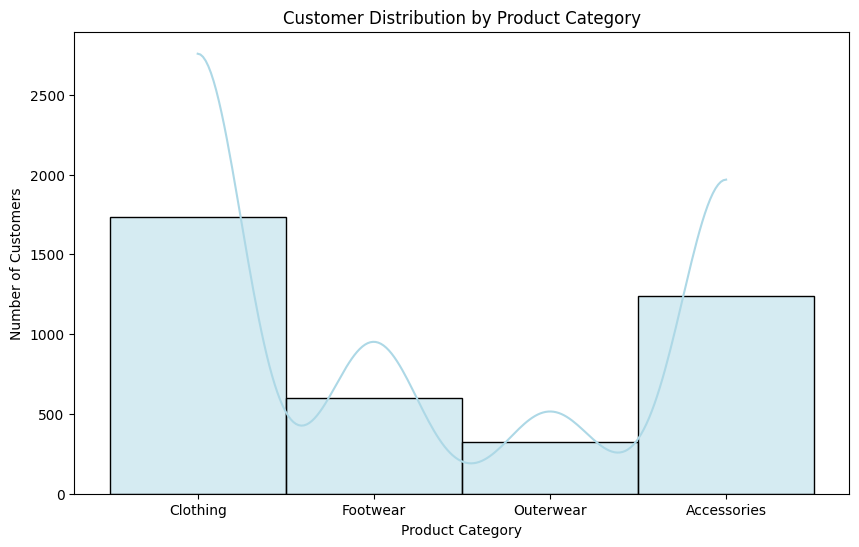

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Product Category'], kde=True, color='lightblue', bins=20)
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Product Category')
plt.show()

produk yang paling banyak dibeli yaitu berasal dari kategori Clothing, kemudian diikuti Accessories, Footwear dan yg paling sedikit yaitu Outerwear

### Payment Method distribution

In [ ]:
payment_method_counts = df['Payment Method'].value_counts()

payment_method_counts

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


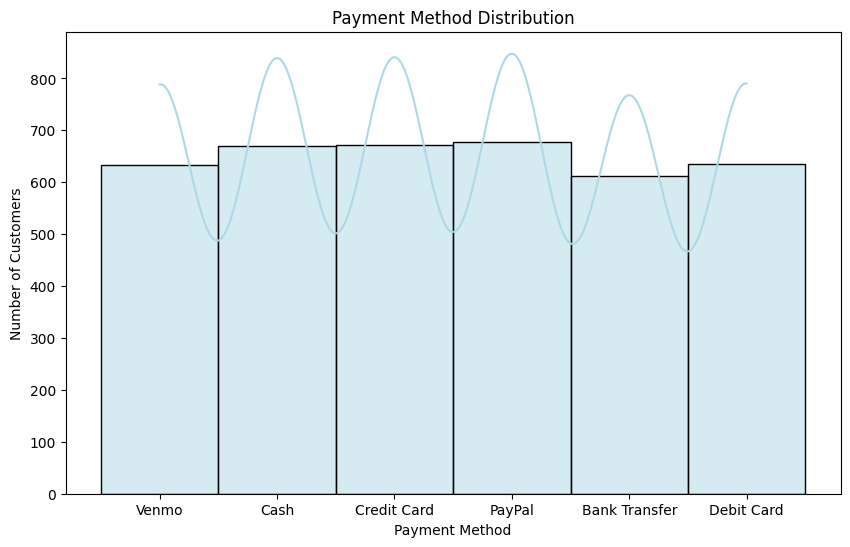

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Payment Method'], kde=True, color='lightblue', bins=20)
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.title('Payment Method Distribution')
plt.show()

metode pembayaran yang paling banyak digunakan oleh pelanggan yaitu **Paypal** sedangkan yg paling jarang digunakan yaitu **Bank Transfer**

### Shipping Mode Distribution

In [ ]:
shipping_mode_counts = df['Shipping Mode'].value_counts().reset_index()
shipping_mode_counts.columns = ['Shipping Mode', 'Count']

shipping_mode_counts

,Shipping Mode,Count
0,Online,3250
1,Offline,650


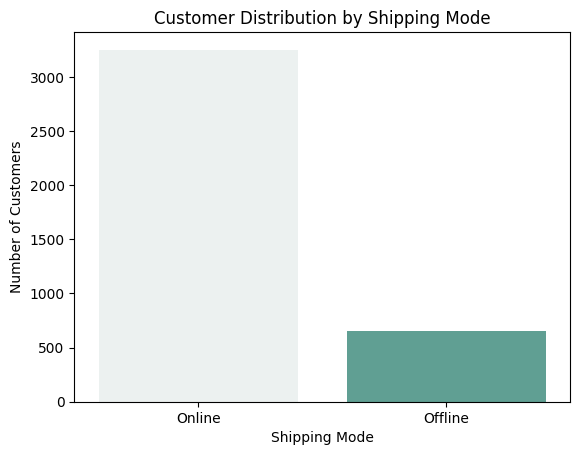

In [ ]:
sns.barplot(data=shipping_mode_counts, x='Shipping Mode', y='Count', hue='Shipping Mode', palette='light:#5A9')
plt.title('Customer Distribution by Shipping Mode')
plt.ylabel('Number of Customers')
plt.show()

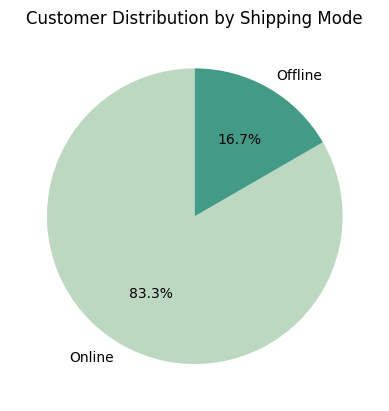

In [ ]:
plt.pie(shipping_mode_counts['Count'], labels=shipping_mode_counts['Shipping Mode'], autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Customer Distribution by Shipping Mode')
plt.show()

80% pelanggan lebih menyukai pengiriman produk secara online dibandingkan offline atau store pick up

### Review Rating Distribution

In [ ]:
gender_rating = df.groupby('Gender')['Review Rating'].mean().reset_index()

gender_rating

,Gender,Review Rating
0,Female,3.753959
1,Male,3.741426


<ipython-input-58-e5f9688a376e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_rating, x='Gender', y='Review Rating', palette='light:#5A9')


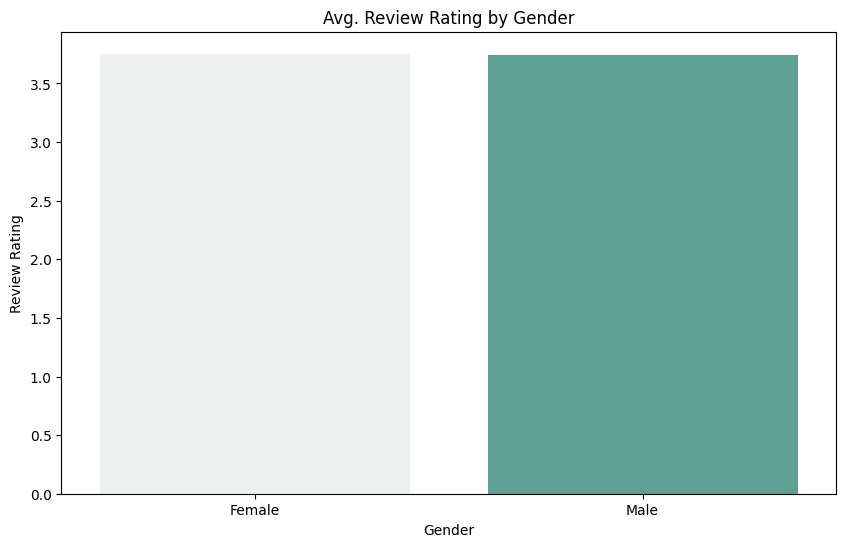

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_rating, x='Gender', y='Review Rating', palette='light:#5A9')
plt.title('Avg. Review Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.show()

wanita cenderung memberikan rating ulasan yang lebih tinggi dibandingkan pria, dengan menargetkan pelanggan wanita bisa lebih meningkatkan reputasi bisnis secara keseluruhan

### Promo Code Used Distribution

In [ ]:
promo_used = df['Promo Code Used'].value_counts()

promo_used

,count
Promo Code Used,
No,2223
Yes,1677


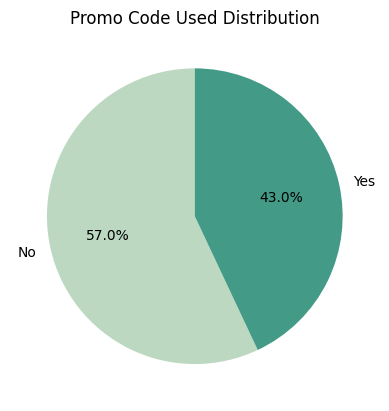

In [ ]:
plt.pie(promo_used, labels=promo_used.index, autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Promo Code Used Distribution')
plt.show()

lebih banyak yg tidak menggunakan promo

#### Promo Code Used Distribution by Gender

In [ ]:
gender_promo_used = pd.pivot_table(
    data=df,
    index=['Gender', 'Promo Code Used'],
    values='Customer ID',
    aggfunc='count'
).reset_index()

gender_promo_used

,Gender,Promo Code Used,Customer ID
0,Female,No,975
1,Female,Yes,1677
2,Male,No,1248


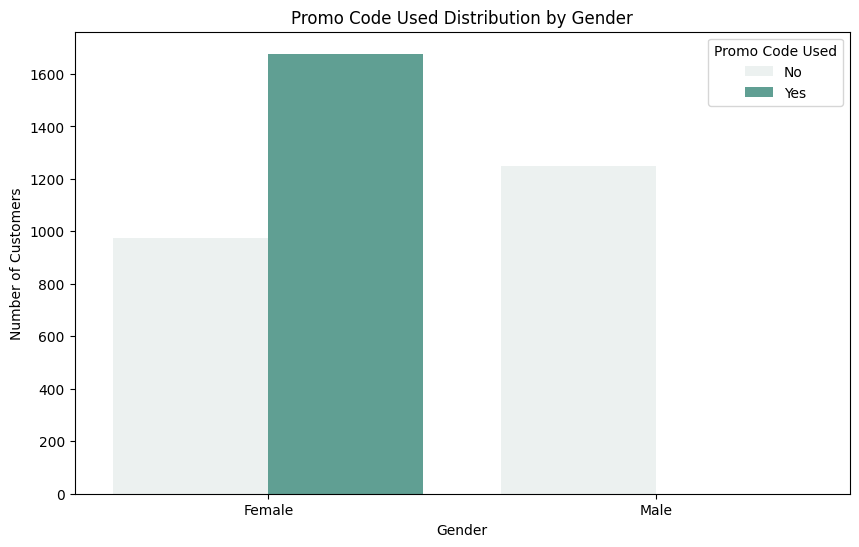

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_promo_used, x='Gender', y='Customer ID', hue='Promo Code Used', palette='light:#5A9')
plt.title('Promo Code Used Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

pelanggan wanita lebih banyak yg menggunakan promo daripada yg tidak menggunakan sedangkan pelanggan pria tidak ada yg menggunakan promo

### Subscription Distribution

In [ ]:
subs_counts = df['Subscription Status'].value_counts().reset_index()
subs_counts.columns = ['Subscription Status', 'Count']

subs_counts

,Subscription Status,Count
0,No,2847
1,Yes,1053


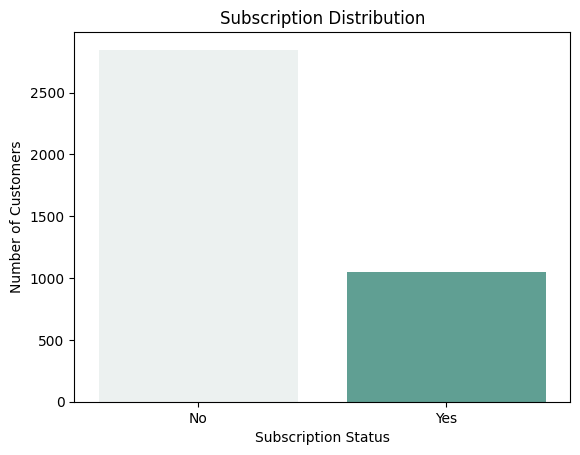

In [ ]:
sns.barplot(data=subs_counts, x='Subscription Status', y='Count', hue='Subscription Status', palette='light:#5A9')
plt.title('Subscription Distribution')
plt.ylabel('Number of Customers')
plt.show()

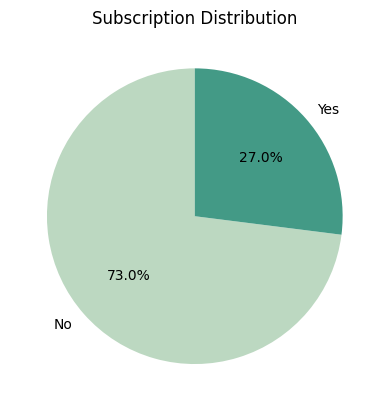

In [ ]:
plt.pie(subs_counts['Count'], labels=subs_counts['Subscription Status'], autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Subscription Distribution')
plt.show()

berdasarkan chart, pelanggan lebih banyak yang **tidak berlangganan** yaitu sebanyak 2847 pelanggan

#### Non-subscribers

In [ ]:
#filter the dataframe for customers that do not subscriber
non_subscribers = df[df['Subscription Status'] == 'No']

non_subscribers

,Customer ID,Age,Gender,Item Purchased,Product Category,Purchase Amount (USD),Location,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Shipping Mode
1053,1054,59,Female,Blouse,Clothing,70,Kansas,3.3,No,2-Day Shipping,Yes,10,Debit Card,Bi-Weekly,51-60,Online
1054,1055,18,Female,Shorts,Clothing,96,Arkansas,4.9,No,Express,Yes,48,PayPal,Quarterly,10-20,Online
1055,1056,70,Female,Jacket,Outerwear,27,Massachusetts,3.3,No,Next Day Air,Yes,24,Debit Card,Annually,61-70,Online
1056,1057,20,Female,Sweater,Clothing,64,Idaho,2.9,No,2-Day Shipping,Yes,42,Venmo,Fortnightly,10-20,Online
1057,1058,65,Female,Jacket,Outerwear,23,Wisconsin,4.4,No,2-Day Shipping,Yes,20,Credit Card,Weekly,61-70,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Male,Hoodie,Clothing,28,Virginia,4.2,No,2-Day Shipping,No,32,Venmo,Weekly,31-40,Online
3896,3897,52,Male,Backpack,Accessories,49,Iowa,4.5,No,Store Pickup,No,41,Bank Transfer,Bi-Weekly,51-60,Offline
3897,3898,46,Male,Belt,Accessories,33,New Jersey,2.9,No,Standard,No,24,Venmo,Quarterly,41-50,Online
3898,3899,44,Male,Shoes,Footwear,77,Minnesota,3.8,No,Express,No,24,Venmo,Weekly,41-50,Online


##### Total Non-Subs Customer by Gender

In [ ]:
#group by gender and count the number of non-subs customers
gender_non_subs = non_subscribers['Gender'].value_counts().reset_index()
gender_non_subs.columns = ['Gender', 'Count']

gender_non_subs

,Gender,Count
0,Female,1599
1,Male,1248


<ipython-input-68-504df5b81d71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_non_subs, x='Gender', y='Count', palette='light:#5A9')


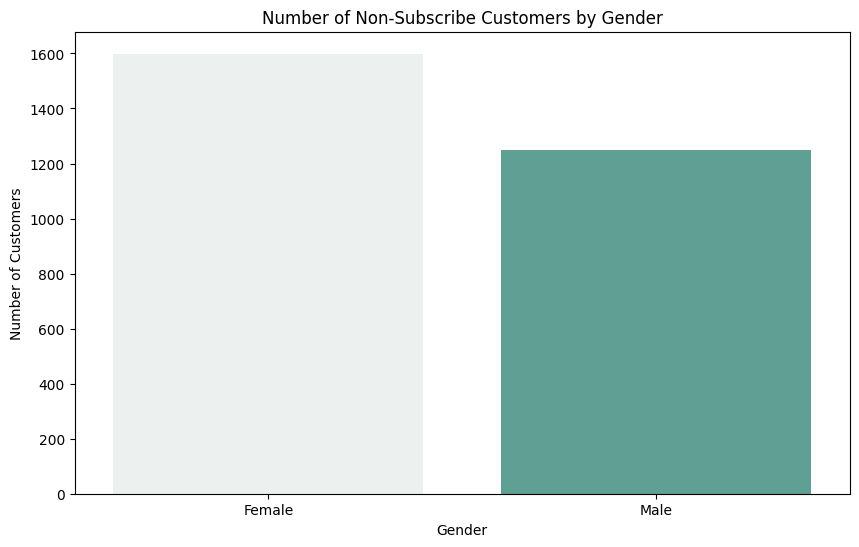

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_non_subs, x='Gender', y='Count', palette='light:#5A9')
plt.title('Number of Non-Subscribe Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

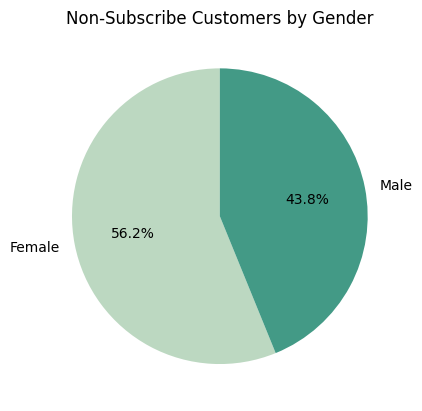

In [ ]:
plt.pie(gender_non_subs['Count'], labels=gender_non_subs['Gender'], autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Non-Subscribe Customers by Gender')
plt.show()

berdasarkan data, pelanggan yang **tidak berlangganan lebih banyak** yg berasal dari kalangan **wanita**

##### Total Non-Subs Female Cust by Age Group

In [ ]:
#count the total number of female customers who do not subscribe
non_subs_female = df[(df['Gender'] == 'Female') & (df['Subscription Status'] == 'No')]

non_subs_female

,Customer ID,Age,Gender,Item Purchased,Product Category,Purchase Amount (USD),Location,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Shipping Mode
1053,1054,59,Female,Blouse,Clothing,70,Kansas,3.3,No,2-Day Shipping,Yes,10,Debit Card,Bi-Weekly,51-60,Online
1054,1055,18,Female,Shorts,Clothing,96,Arkansas,4.9,No,Express,Yes,48,PayPal,Quarterly,10-20,Online
1055,1056,70,Female,Jacket,Outerwear,27,Massachusetts,3.3,No,Next Day Air,Yes,24,Debit Card,Annually,61-70,Online
1056,1057,20,Female,Sweater,Clothing,64,Idaho,2.9,No,2-Day Shipping,Yes,42,Venmo,Fortnightly,10-20,Online
1057,1058,65,Female,Jacket,Outerwear,23,Wisconsin,4.4,No,2-Day Shipping,Yes,20,Credit Card,Weekly,61-70,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2648,60,Female,Shoes,Footwear,58,South Carolina,3.3,No,2-Day Shipping,No,25,Debit Card,Annually,51-60,Online
2648,2649,51,Female,Pants,Clothing,84,Illinois,3.9,No,Next Day Air,No,14,PayPal,Bi-Weekly,51-60,Online
2649,2650,23,Female,Gloves,Accessories,21,Minnesota,3.9,No,Store Pickup,No,14,Bank Transfer,Fortnightly,21-30,Offline
2650,2651,20,Female,Socks,Clothing,35,Oregon,4.2,No,Standard,No,46,Credit Card,Every 3 Months,10-20,Online


In [ ]:
#group by age group and count the number of non-subs female customers
age_group_ns_f = non_subs_female['Age Group'].value_counts().reset_index()
age_group_ns_f.columns = ['Age Group', 'Count']

age_group_ns_f

,Age Group,Count
0,51-60,315
1,21-30,307
2,61-70,300
3,31-40,296
4,41-50,283
5,10-20,98


In [ ]:
#custom palette with shades of green and grey
custom_palette = ['#d8f3dc', '#b7e4c7', '#95d5b2', '#99e2b4', '#74c69d', '#52b788', '#40916c', '#2d6a4f', '#1b4332', '#081c15']

<ipython-input-73-ad87d0ae0524>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= age_group_ns_f, x='Age Group', y='Count', palette=custom_palette)
<ipython-input-73-ad87d0ae0524>:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data= age_group_ns_f, x='Age Group', y='Count', palette=custom_palette)


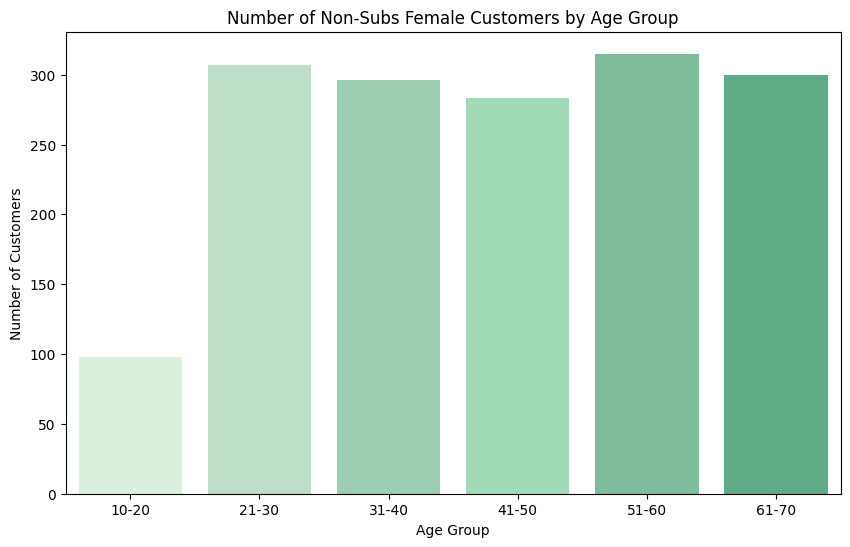

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data= age_group_ns_f, x='Age Group', y='Count', palette=custom_palette)
plt.title('Number of Non-Subs Female Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

berdasarkan data, pelanggan wanita yg tidak berlangganan didominasi oleh kalangan usia 51-60thn, lalu diikuti 21-30 thn dan 61-70 thn.

##### Total non-subs Female Customers by Location

In [ ]:
#group by location and count the number of non-subs female customers
loc_ns_f = non_subs_female['Location'].value_counts().reset_index()
loc_ns_f.columns = ['Location', 'Count']

loc_ns_f

,Location,Count
0,Vermont,41
1,Indiana,41
2,New York,41
3,Illinois,40
4,Idaho,40
5,Alabama,40
6,New Mexico,39
7,Maryland,38
8,Wisconsin,37
9,California,37


<ipython-input-75-661078919d0b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_loc_ns_f, x= 'Count', y= 'Location', palette=custom_palette)


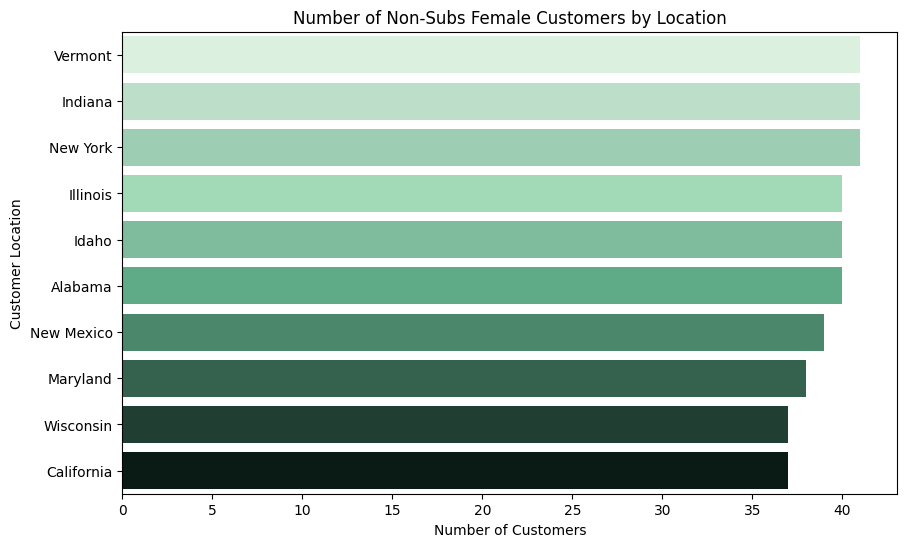

In [ ]:
#select the top 10 locations
top_10_loc_ns_f = loc_ns_f.head(10)

#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_loc_ns_f, x= 'Count', y= 'Location', palette=custom_palette)
plt.title('Number of Non-Subs Female Customers by Location')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Location')
plt.show()

Pelanggan wanita yg tidak berlangganan didominasi oleh pelanggan yang berasal dari kota Vermont, Indiana dan New York.

##### Total Non-Subs Female Customers by Frequency of Purchases

In [ ]:
#group by freq. of purchases and count the number of non-subs female customers
freq_purchases_ns_f = non_subs_female['Frequency of Purchases'].value_counts().reset_index()
freq_purchases_ns_f.columns = ['Frequency of Purchases', 'Count']

freq_purchases_ns_f

,Frequency of Purchases,Count
0,Quarterly,254
1,Every 3 Months,244
2,Annually,227
3,Fortnightly,226
4,Bi-Weekly,219
5,Monthly,219
6,Weekly,210


<ipython-input-77-21088253daf1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= freq_purchases_ns_f, x= 'Frequency of Purchases', y= 'Count', palette=custom_palette)
<ipython-input-77-21088253daf1>:3: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data= freq_purchases_ns_f, x= 'Frequency of Purchases', y= 'Count', palette=custom_palette)


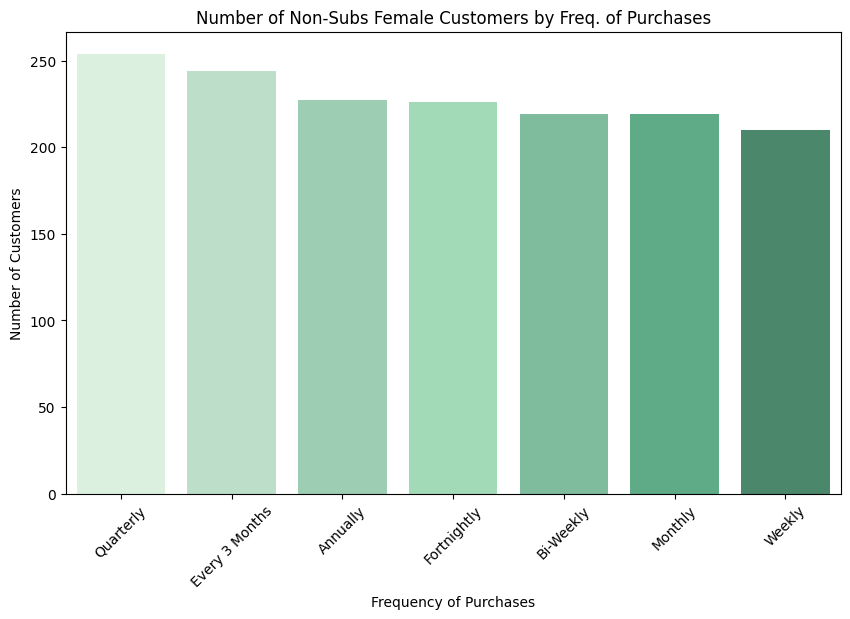

In [ ]:
#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data= freq_purchases_ns_f, x= 'Frequency of Purchases', y= 'Count', palette=custom_palette)
plt.title('Number of Non-Subs Female Customers by Freq. of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Pelanggan wanita yg tidak berlangganan ini frekuensi belanjanya sekitar 3 atau 4 bulan sekali.

##### Total Non-Subs Female Cust by Purchase Amount

In [ ]:
#define the bins and labels for purchase amount ranges
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20 USD', '21-40 USD', '41-60 USD', '61-80 USD', '81-100 USD']

#create a new column with binned purchase amounts
non_subs_female['Purchase Amount Range'] = pd.cut(non_subs_female['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)

#group by Purchase Amount range and count the number of non-subs female customers
purchase_amount_ns_f = non_subs_female['Purchase Amount Range'].value_counts().reset_index()
purchase_amount_ns_f.columns = ['Purchase Amount Range', 'Count']

purchase_amount_ns_f

<ipython-input-78-3966df8b0d2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_subs_female['Purchase Amount Range'] = pd.cut(non_subs_female['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)


,Purchase Amount Range,Count
0,21-40 USD,436
1,81-100 USD,409
2,61-80 USD,380
3,41-60 USD,361
4,0-20 USD,0


<ipython-input-79-6b648a6df03e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= purchase_amount_ns_f, x= 'Purchase Amount Range', y= 'Count', palette=custom_palette)
<ipython-input-79-6b648a6df03e>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data= purchase_amount_ns_f, x= 'Purchase Amount Range', y= 'Count', palette=custom_palette)


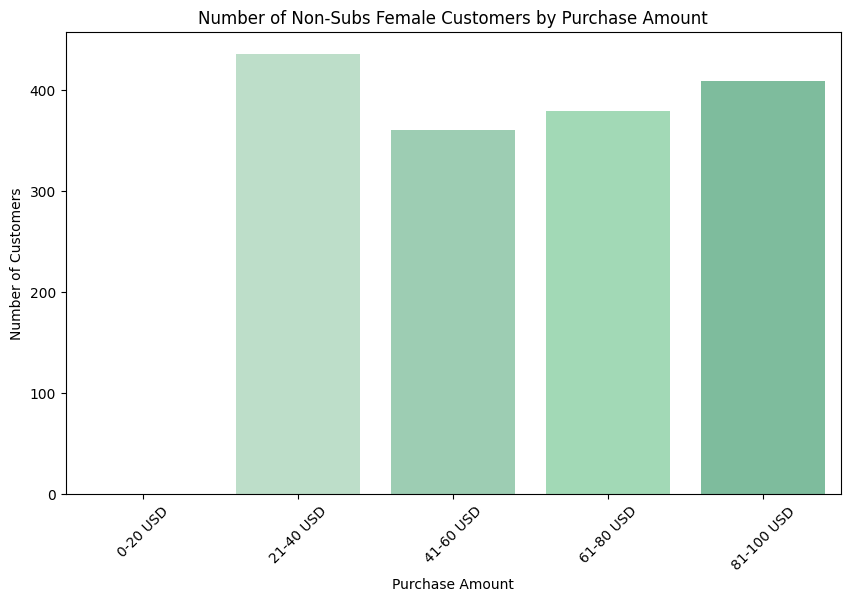

In [ ]:
#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data= purchase_amount_ns_f, x= 'Purchase Amount Range', y= 'Count', palette=custom_palette)
plt.title('Number of Non-Subs Female Customers by Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

pelanggan wanita yg tidak berlangganan ini menghabiskan biaya belanja sekitar 21-40 USD, lalu diikuti 81-100 USD, 61-80 USD dan 41-60 USD

##### Total Non-Subs Female Cust by Previous Purchases

In [ ]:
#define the bins and labels for previous purchases range
bin = [0, 10, 20, 30, 40, 50]
label = ['0-10', '11-20', '21-30', '31-40', '41-50']

#create a new column with binned previous purchases
non_subs_female['Previous Purchases Range'] = pd.cut(non_subs_female['Previous Purchases'], bins=bin, labels=label, right=False)

#group by previous purchases range and count the non-subs female customer
prev_purchases_ns_f = non_subs_female['Previous Purchases Range'].value_counts().reset_index()
prev_purchases_ns_f.columns = ['Previous Purchases Range', 'Count']

prev_purchases_ns_f

<ipython-input-80-ab7291665b50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_subs_female['Previous Purchases Range'] = pd.cut(non_subs_female['Previous Purchases'], bins=bin, labels=label, right=False)


,Previous Purchases Range,Count
0,21-30,348
1,41-50,322
2,31-40,307
3,0-10,296
4,11-20,289


<ipython-input-81-15c224754e4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= prev_purchases_ns_f, x= 'Previous Purchases Range', y= 'Count', palette=custom_palette)
<ipython-input-81-15c224754e4f>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data= prev_purchases_ns_f, x= 'Previous Purchases Range', y= 'Count', palette=custom_palette)


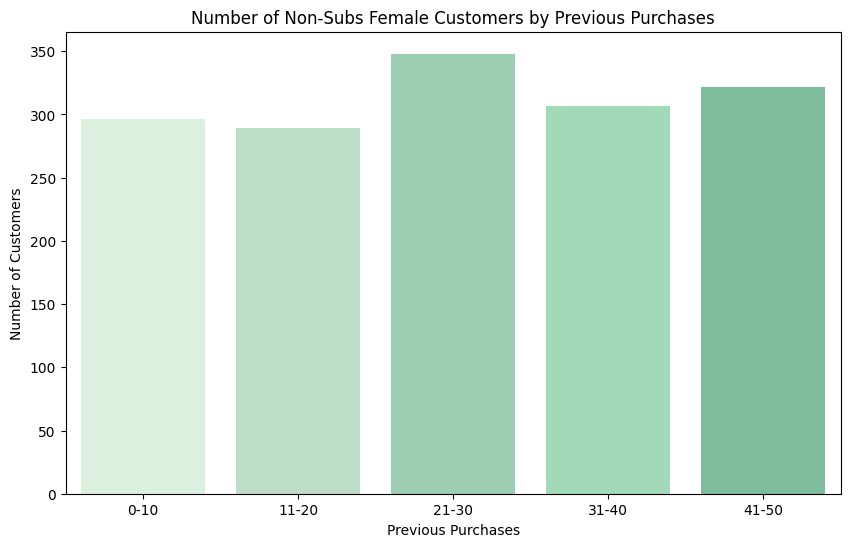

In [ ]:
#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data= prev_purchases_ns_f, x= 'Previous Purchases Range', y= 'Count', palette=custom_palette)
plt.title('Number of Non-Subs Female Customers by Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Number of Customers')
plt.show()

pelanggan wanita yg tidak berlangganan ini telah melakukan pembelian produk sekitar 21-30 kali

##### Total Non-Subs Female Cust by Promo Code Used

In [ ]:
#group by promo code used and count the number of non-subs female customers
promo_ns_f = non_subs_female['Promo Code Used'].value_counts().reset_index()
promo_ns_f.columns = ['Promo Code Used', 'Count']

promo_ns_f

,Promo Code Used,Count
0,No,975
1,Yes,624


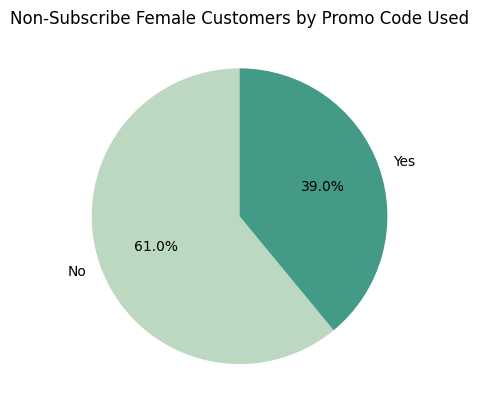

In [ ]:
plt.pie(promo_ns_f['Count'], labels=promo_ns_f['Promo Code Used'], autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Non-Subscribe Female Customers by Promo Code Used')
plt.show()

berdasarkan data, pelanggan wanita yg tidak berlangganan lebih banyak yg tidak menggunakan promo

#### Subscribers

In [ ]:
#filter the dataframe for customers that subscribe
subscribers = df[df['Subscription Status'] == 'Yes']

subscribers

,Customer ID,Age,Gender,Item Purchased,Product Category,Purchase Amount (USD),Location,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Shipping Mode
0,1,55,Female,Blouse,Clothing,53,Kentucky,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,51-60,Online
1,2,19,Female,Sweater,Clothing,64,Maine,3.1,Yes,Express,Yes,2,Cash,Fortnightly,10-20,Online
2,3,50,Female,Jeans,Clothing,73,Massachusetts,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,41-50,Online
3,4,21,Female,Sandals,Footwear,90,Rhode Island,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,21-30,Online
4,5,45,Female,Blouse,Clothing,49,Oregon,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,41-50,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1049,30,Female,Socks,Clothing,77,Maine,2.7,Yes,Standard,Yes,19,Venmo,Fortnightly,21-30,Online
1049,1050,45,Female,Sunglasses,Accessories,33,Virginia,2.8,Yes,Store Pickup,Yes,24,Cash,Quarterly,41-50,Offline
1050,1051,48,Female,Sneakers,Footwear,64,Florida,3.8,Yes,Next Day Air,Yes,19,Venmo,Monthly,41-50,Online
1051,1052,45,Female,Socks,Clothing,53,Ohio,2.6,Yes,Free Shipping,Yes,39,PayPal,Annually,41-50,Online


##### Total Subs Customer by Gender

In [ ]:
#group by gender and count the number of subs customers
gender_subs = subscribers['Gender'].value_counts().reset_index()
gender_subs.columns = ['Gender', 'Count']

gender_subs

,Gender,Count
0,Female,1053


<ipython-input-86-0d4c011c9874>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_subs, x='Gender', y='Count', palette='light:#5A9')


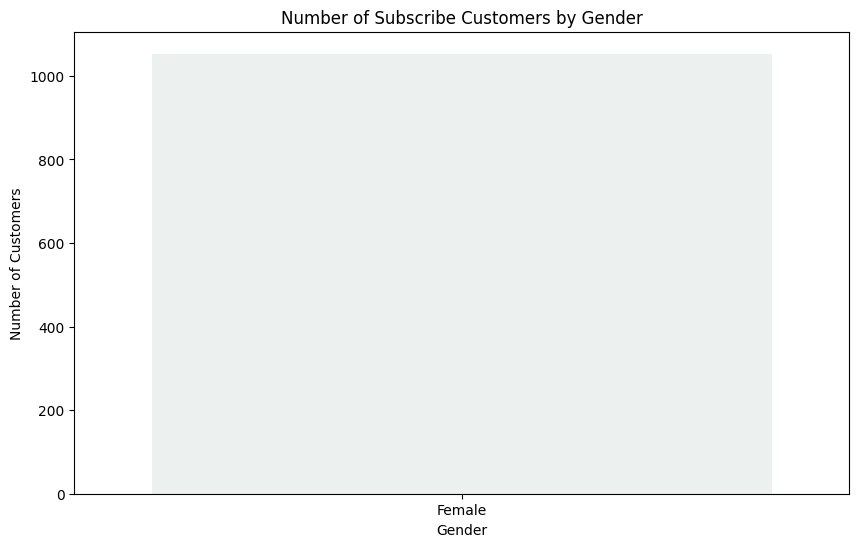

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_subs, x='Gender', y='Count', palette='light:#5A9')
plt.title('Number of Subscribe Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

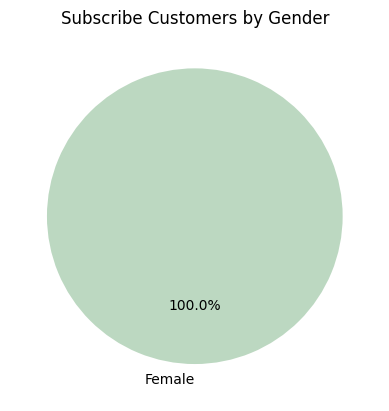

In [ ]:
plt.pie(gender_subs['Count'], labels=gender_subs['Gender'], autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Subscribe Customers by Gender')
plt.show()

pelanggan yang melakukan berlangganan didominasi oleh pelanggan wanita, sedangkan pelanggan pria tidak ada yg berlangganan sama sekali

##### Total Subs Female Cust by Age Group

In [ ]:
#count the total number of female customers who subscribe
subs_female = df[(df['Gender'] == 'Female') & (df['Subscription Status'] == 'Yes')]

subs_female

,Customer ID,Age,Gender,Item Purchased,Product Category,Purchase Amount (USD),Location,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Shipping Mode
0,1,55,Female,Blouse,Clothing,53,Kentucky,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,51-60,Online
1,2,19,Female,Sweater,Clothing,64,Maine,3.1,Yes,Express,Yes,2,Cash,Fortnightly,10-20,Online
2,3,50,Female,Jeans,Clothing,73,Massachusetts,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,41-50,Online
3,4,21,Female,Sandals,Footwear,90,Rhode Island,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,21-30,Online
4,5,45,Female,Blouse,Clothing,49,Oregon,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,41-50,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1049,30,Female,Socks,Clothing,77,Maine,2.7,Yes,Standard,Yes,19,Venmo,Fortnightly,21-30,Online
1049,1050,45,Female,Sunglasses,Accessories,33,Virginia,2.8,Yes,Store Pickup,Yes,24,Cash,Quarterly,41-50,Offline
1050,1051,48,Female,Sneakers,Footwear,64,Florida,3.8,Yes,Next Day Air,Yes,19,Venmo,Monthly,41-50,Online
1051,1052,45,Female,Socks,Clothing,53,Ohio,2.6,Yes,Free Shipping,Yes,39,PayPal,Annually,41-50,Online


In [ ]:
#group by age group and count the number of subs female customers
age_group_s_f = subs_female['Age Group'].value_counts().reset_index()
age_group_s_f.columns = ['Age Group', 'Count']

age_group_s_f

,Age Group,Count
0,41-50,209
1,51-60,208
2,61-70,195
3,21-30,194
4,31-40,192
5,10-20,55


In [ ]:
#custom palette with shades of blue and grey
custom_palette2 = ['#d8f3dc', '#caf0f8', '#ade8f4', '#90e0ef', '#48cae4', '#00b4d8', '#0096c7', '#0077b6', '#023e8a', '#03045e']

<ipython-input-91-fa3112a89153>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_s_f, x='Age Group', y='Count', palette=custom_palette2)
<ipython-input-91-fa3112a89153>:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=age_group_s_f, x='Age Group', y='Count', palette=custom_palette2)


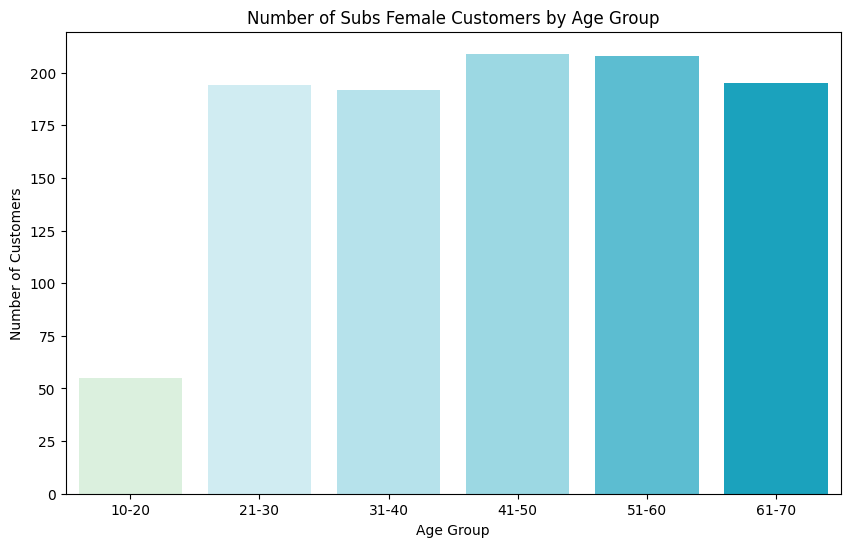

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_s_f, x='Age Group', y='Count', palette=custom_palette2)
plt.title('Number of Subs Female Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

berdasarkan data, pelanggan wanita yg berlangganan didominasi oleh kalangan usia 41-50 thn, lalu diikuti usia 51-60 thn dan 61-70 thn

##### Total Subs Female Customers by Location

In [ ]:
#group by location and count the number of subs female customers
loc_s_f = subs_female['Location'].value_counts().reset_index()
loc_s_f.columns = ['Location', 'Count']

loc_s_f

,Location,Count
0,Nevada,30
1,California,29
2,West Virginia,28
3,Delaware,28
4,South Carolina,27
5,Missouri,27
6,Kentucky,26
7,Minnesota,26
8,Nebraska,25
9,Montana,25


<ipython-input-93-4cc0d1e8a4f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_loc_s_f, x= 'Count', y= 'Location', palette=custom_palette2)


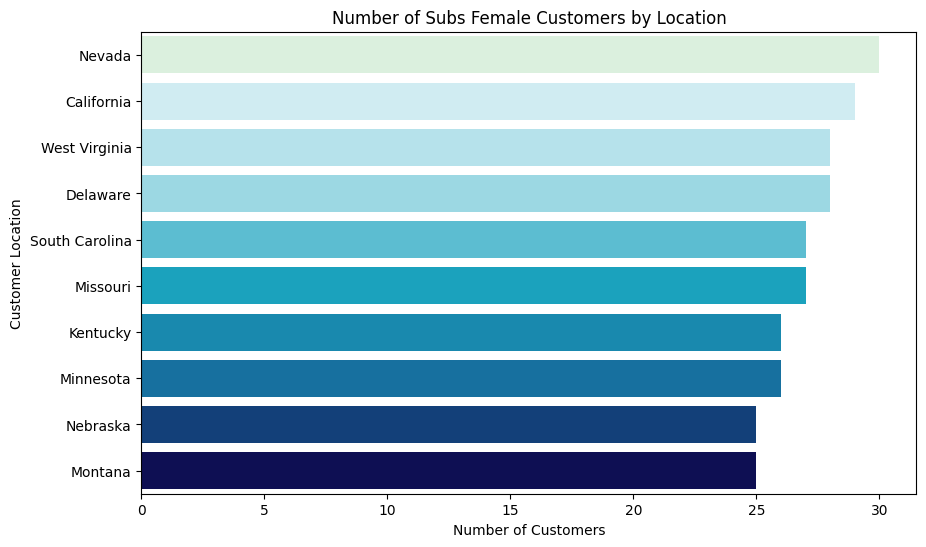

In [ ]:
#select the top 10 locations
top_10_loc_s_f = loc_s_f.head(10)

#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_loc_s_f, x= 'Count', y= 'Location', palette=custom_palette2)
plt.title('Number of Subs Female Customers by Location')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Location')
plt.show()

pelanggan wanita yg berlangganan banyak yg berasal dari kota Nevada, California, West Virginia dan Delaware

##### Total Subs Female Customers by Frequency of Purchases

In [ ]:
#group by freq. of purchases and count the number of subs female customers
freq_purchases_s_f = subs_female['Frequency of Purchases'].value_counts().reset_index()
freq_purchases_s_f.columns = ['Frequency of Purchases', 'Count']

freq_purchases_s_f

,Frequency of Purchases,Count
0,Annually,160
1,Weekly,157
2,Every 3 Months,154
3,Fortnightly,153
4,Monthly,149
5,Quarterly,140
6,Bi-Weekly,140


<ipython-input-95-9b82686e0b3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= freq_purchases_s_f, x= 'Frequency of Purchases', y= 'Count', palette=custom_palette2)
<ipython-input-95-9b82686e0b3c>:3: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data= freq_purchases_s_f, x= 'Frequency of Purchases', y= 'Count', palette=custom_palette2)


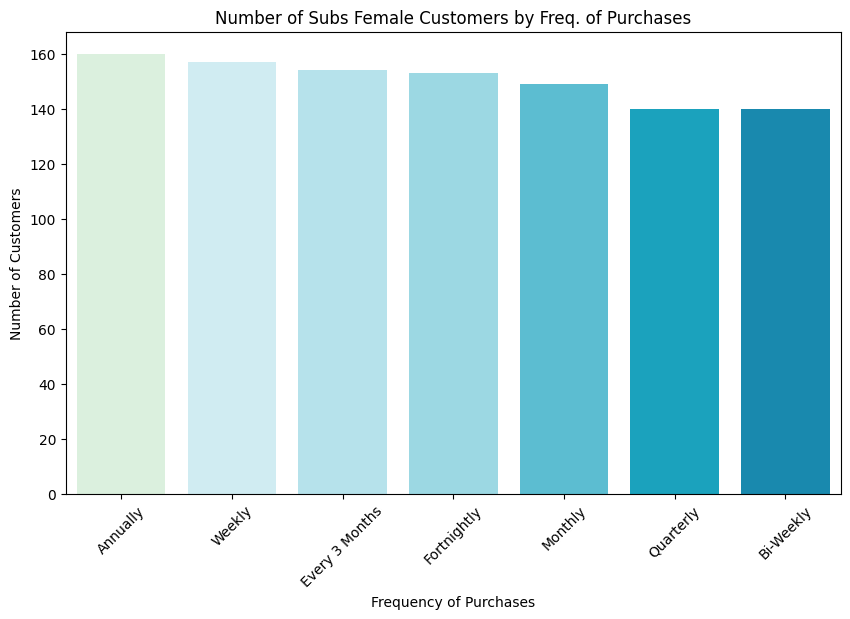

In [ ]:
#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data= freq_purchases_s_f, x= 'Frequency of Purchases', y= 'Count', palette=custom_palette2)
plt.title('Number of Subs Female Customers by Freq. of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

pelanggan wanita yg berlangganan ini frekuensi belanjanya bisa setahun sekali atau seminggu sekali

##### Total Subs Female Cust by Purchase Amount

In [ ]:
#create a new column with binned purchase amounts
subs_female['Purchase Amount Range'] = pd.cut(subs_female['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)

#group by Purchase Amount range and count the number of non-subs female customers
purchase_amount_s_f = subs_female['Purchase Amount Range'].value_counts().reset_index()
purchase_amount_s_f.columns = ['Purchase Amount Range', 'Count']

purchase_amount_s_f

<ipython-input-96-777888a55aa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_female['Purchase Amount Range'] = pd.cut(subs_female['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)


,Purchase Amount Range,Count
0,21-40 USD,273
1,61-80 USD,261
2,81-100 USD,256
3,41-60 USD,251
4,0-20 USD,0


<ipython-input-97-987bc188455b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= purchase_amount_s_f, x= 'Purchase Amount Range', y= 'Count', palette=custom_palette2)
<ipython-input-97-987bc188455b>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data= purchase_amount_s_f, x= 'Purchase Amount Range', y= 'Count', palette=custom_palette2)


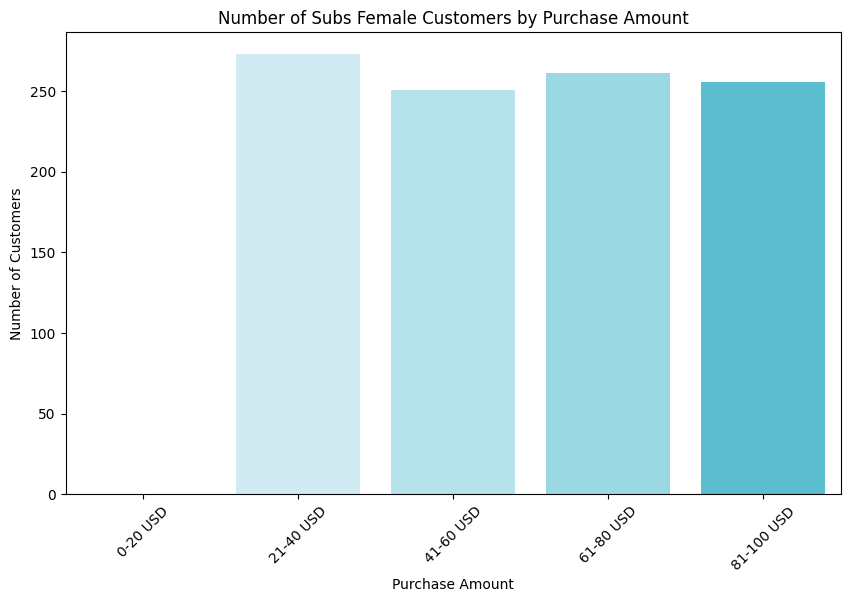

In [ ]:
#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data= purchase_amount_s_f, x= 'Purchase Amount Range', y= 'Count', palette=custom_palette2)
plt.title('Number of Subs Female Customers by Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

pelanggan wanita yg berlangganan mengeluarkan biaya pembelian sebesar 21-40 USD, lalu diikuti 61-80 USD, 81-100 USD dan 41-60 USD

##### Total Subs Female Cust by Previous Purchases

In [ ]:
#create a new column with binned previous purchases
subs_female['Previous Purchases Range'] = pd.cut(subs_female['Previous Purchases'], bins=bin, labels=label, right=False)

#group by previous purchases range and count the non-subs female customer
prev_purchases_s_f = subs_female['Previous Purchases Range'].value_counts().reset_index()
prev_purchases_s_f.columns = ['Previous Purchases Range', 'Count']

prev_purchases_s_f

<ipython-input-98-bb9bbef697de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_female['Previous Purchases Range'] = pd.cut(subs_female['Previous Purchases'], bins=bin, labels=label, right=False)


,Previous Purchases Range,Count
0,31-40,233
1,21-30,216
2,11-20,209
3,41-50,208
4,0-10,166


<ipython-input-99-9c38baeeedc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= prev_purchases_s_f, x= 'Previous Purchases Range', y= 'Count', palette=custom_palette2)
<ipython-input-99-9c38baeeedc5>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data= prev_purchases_s_f, x= 'Previous Purchases Range', y= 'Count', palette=custom_palette2)


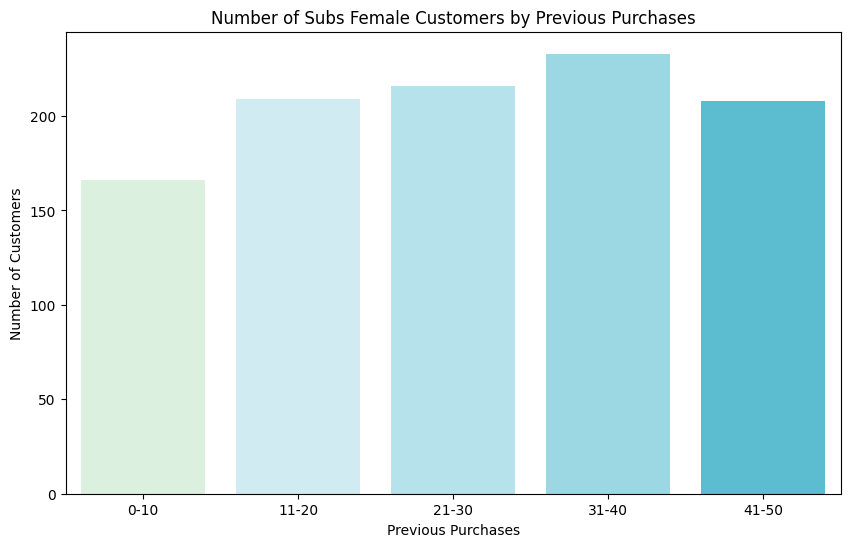

In [ ]:
#create the barplot
plt.figure(figsize=(10,6))
sns.barplot(data= prev_purchases_s_f, x= 'Previous Purchases Range', y= 'Count', palette=custom_palette2)
plt.title('Number of Subs Female Customers by Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Number of Customers')
plt.show()

pelanggan wanita yg berlangganan telah melakukan pembelian sekitar 31-40 kali, lalu diikuti 21-30 kali, 11-20 kali

##### Total Subs Female Cust by Promo Code Used

In [ ]:
#group by promo code used and count the number of subs female customers
promo_s_f = subs_female['Promo Code Used'].value_counts().reset_index()
promo_s_f.columns = ['Promo Code Used', 'Count']

promo_s_f

,Promo Code Used,Count
0,Yes,1053


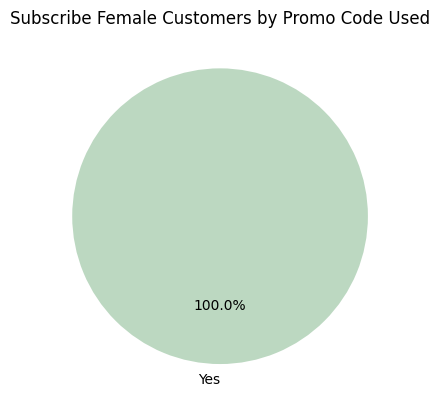

In [ ]:
plt.pie(promo_s_f['Count'], labels=promo_s_f['Promo Code Used'], autopct='%1.1f%%', startangle=90, colors=['#bcd8c1', '#439a86'])
plt.title('Subscribe Female Customers by Promo Code Used')
plt.show()

berdasarkan data, semua pelanggan wanita yg berlangganan pasti menggunakan promo code used

## Pearson Correlation Analysis

In [ ]:
#columns that want to keep
columns_to_keep = ['Age', 'Gender', 'Location', 'Frequency of Purchases','Previous Purchases',
                   'Purchase Amount (USD)', 'Subscription Status', 'Promo Code Used']

#keep only the specified columns
df_copy = df[columns_to_keep]

#encode the column with categorical type into numeric type to be able for correlation analysis
le = LabelEncoder()

df_copy['Gender'] = le.fit_transform(df_copy['Gender'])
df_copy['Subscription Status'] = le.fit_transform(df_copy['Subscription Status'])
df_copy['Frequency of Purchases'] = le.fit_transform(df_copy['Frequency of Purchases'])
df_copy['Location'] = le.fit_transform(df_copy['Location'])
df_copy['Promo Code Used'] = le.fit_transform(df_copy['Promo Code Used'])

df_copy.corr(method='pearson')

<ipython-input-102-12186f846a7c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Gender'] = le.fit_transform(df_copy['Gender'])
<ipython-input-102-12186f846a7c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Subscription Status'] = le.fit_transform(df_copy['Subscription Status'])
<ipython-input-102-12186f846a7c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Age,Gender,Location,Frequency of Purchases,Previous Purchases,Purchase Amount (USD),Subscription Status,Promo Code Used
Age,1.000000,-0.002763,-0.001957,0.017406,0.040445,-0.010424,0.006492,0.004366
Gender,-0.002763,1.000000,-0.000747,-0.012829,-0.035873,0.014044,-0.417197,-0.595823
Location,-0.001957,-0.000747,1.000000,-0.012740,-0.032962,0.028803,0.004529,0.011926
Frequency of Purchases,0.017406,-0.012829,-0.012740,1.000000,0.040261,-0.017219,0.003601,0.010144
Previous Purchases,0.040445,-0.035873,-0.032962,0.040261,1.000000,0.008063,0.030859,0.023537
Purchase Amount (USD),-0.010424,0.014044,0.028803,-0.017219,0.008063,1.000000,-0.006996,-0.017798
Subscription Status,0.006492,-0.417197,0.004529,0.003601,0.030859,-0.006996,1.000000,0.700202
Promo Code Used,0.004366,-0.595823,0.011926,0.010144,0.023537,-0.017798,0.700202,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

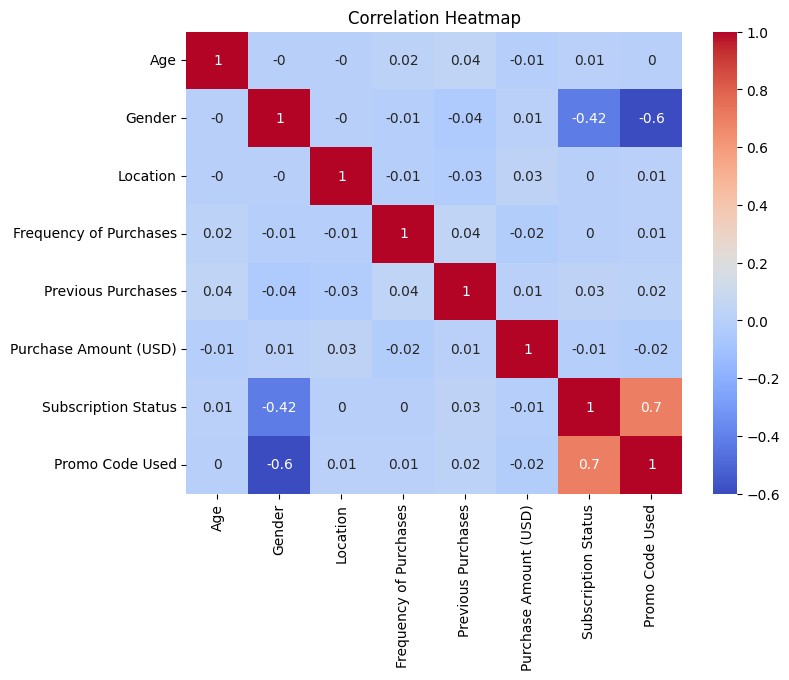

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_copy.corr(method='pearson'). round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize= 12)

Based on correlation heatmap:
1. Promo Code Used has a **strong positive** correlation with Subscription Status. Menunjukkan bahwa semakin meningkatnya promo code maka semakin meningkat pula yg berlangganan.
2. Gender has a **strong negative** correlation with Subscription Status and Promo Code Used. Menunjukkan bahwa semakin beragam gendernya maka semakin turun penggunaan promo dan berlangganannya

reference: [correlation coefficient explanation](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/)

## Summary

yg subs itu kebanyakan di usia produktif atau yg uangnya udah banyak, usia 41-50

Dari analisis diatas didapat insight sebagai berikut:

1.	Pelanggan didominasi oleh kalangan wanita
2.	Rata-rata umur pelanggan yaitu 44 tahun dengan yg termuda berumur 18 tahun dan yg tertua berumur 70 tahun
3.	Pelanggan didominasi oleh usia 41-60 tahun
4.	Produk yang paling diminati yaitu dari kategori Clothing sedangkan yg paling sedikit yaitu Outerwear
5.	Metode pembayaran yang paling banyak digunakan yaitu PayPal sedangkan yg paling sedikit yaitu Bank Transfer
6.	Mode pengiriman barang yang paling banyak digunakan yaitu Online (83%) sedangkan Offline atau store pickup sedikit
7.	Rata-rata review rating yg diberikan pelanggan wanita sedikit lebih tinggi dibandingkan pelanggan pria
8.	Pelanggan lebih banyak yg tidak melakukan berlangganan
9.	Pelanggan yg tidak berlangganan didominasi oleh kalangan wanita sekitar 56% yang mana berumur 51-60 tahun, berasal dari kota Vermont, Indiana dan New York, melakukan pembelian setiap 3-4 bulan sekali, dengan pengeluaran 21-40 USD, total pembelian sekitar 21-30 kali dan 60% pengguna tidak menggunakan promo
10.	Pelanggan yg berlangganan hanya dari kalangan wanita, tidak ada satupun pelanggan pria yg berlanggan. Pelanggan wanita yg berlangganan ini berumur sekitar 41-50 tahun, berasal dari kota Nevada, California, dan West Virginia, melakukan pembelian setiap setahun sekali dan seminggu sekali, dengan pengeluaran 21-40 USD, total pembelian sekitar 31-40 kali dan semua menggunakan promo


## Customer Segmentation using K-Means Clustering

K-Means Clustering is one way to group data into several groups (clusters) based on similar features or attributes. The way to do this is minimizing the distance between points in a cluster and maximizing the distance between cluster.

'''''

To find the optimal K value in K-Means clustering is using the elbow method. In the elbow method, the optimal number of clusters is found at the point where the Within-Cluster-Sum-of-Squares (WCSS) starts to decrease at a slower rate.



reference: [elbow method](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/)

### The Elbow Method

In [ ]:
#select relevant columns for segmentation
df_segment = df[['Age', 'Gender', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]
df_segment.columns = ['Age', 'Gender', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']

#encode data for categorical columns like 'Gender' and 'Frequency of Purchases'
df_segment.replace({'Male': 0, 'Female': 1}, inplace=True)
df_segment.replace({
    'Weekly': 0, 'Bi-Weekly': 1, 'Fortnightly': 2,
    'Monthly': 3, 'Every 3 Months': 4, 'Quarterly': 5, 'Annually': 6}, inplace=True)

df_segment.head()

<ipython-input-104-05df1d79b300>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment.replace({'Male': 0, 'Female': 1}, inplace=True)
<ipython-input-104-05df1d79b300>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment.replace({


,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,55,1,53,14,2
1,19,1,64,2,2
2,50,1,73,23,0
3,21,1,90,49,0
4,45,1,49,31,6


In [ ]:
#create an empty list to store the Within-Cluster-Sum-of-Squares (WCSS) values for various cluster counts
wcss = []

#iterate through different numbers of  clusters to find the optimal number
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state = 42)
    kmeans.fit(df_segment)        #fit the model to the data
    wcss_iter = kmeans.inertia_   #get the WCSS for the current number of clusters
    wcss.append(wcss_iter)        #append the WCSS to the list
    print('Iteration:', i, 'with inertia value:', wcss_iter)

Iteration: 1 with inertia value: 3919258.173333335
Iteration: 2 with inertia value: 2263773.100029841
Iteration: 3 with inertia value: 1888236.8477324147
Iteration: 4 with inertia value: 1583006.1291083808
Iteration: 5 with inertia value: 1378868.3097649105
Iteration: 6 with inertia value: 1203838.4879756665


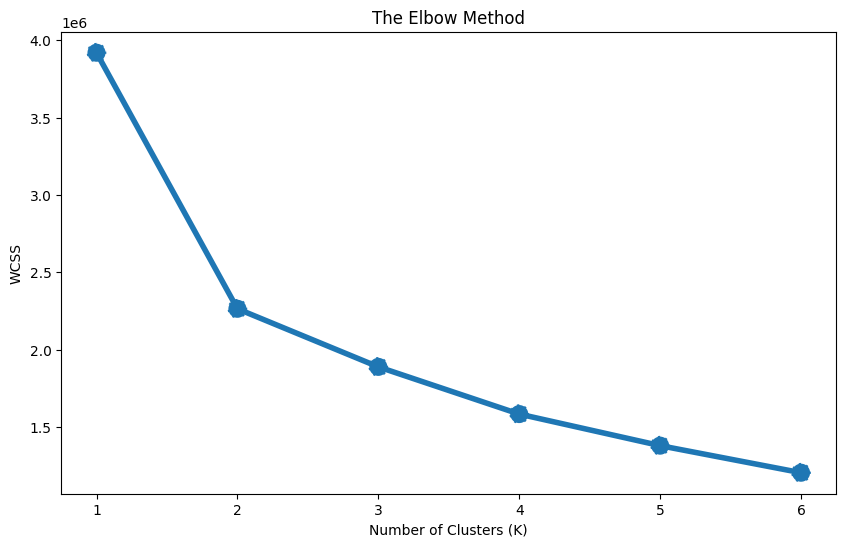

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,7), y=wcss, linewidth=4)
sns.scatterplot(x=range(1,7), y=wcss, s=200, linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

the optimal value for K is 2

In [ ]:
#create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=2)

#fit the KMeans model to the data
kmeans.fit(df_segment)
cluster = kmeans.predict(df_segment)

#assign the cluster to a new column 'Clusters'
df_segment['Clusters'] = cluster
df_segment['Clusters'] = df_segment['Clusters'].replace({0: 'Cluster 1', 1: 'Cluster 2'})

df_segment

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-107-f62c628aeb8d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment['Clusters'] = cluster
<ipython-input-107-f62c628aeb8d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment['Clusters'] = df_segment['Clust

,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Clusters
0,55,1,53,14,2,Cluster 1
1,19,1,64,2,2,Cluster 2
2,50,1,73,23,0,Cluster 2
3,21,1,90,49,0,Cluster 2
4,45,1,49,31,6,Cluster 1
...,...,...,...,...,...,...
3895,40,0,28,32,0,Cluster 1
3896,52,0,49,41,1,Cluster 1
3897,46,0,33,24,5,Cluster 1
3898,44,0,77,24,0,Cluster 2


#### Cluster Visualization use Radar Chart

In [ ]:
#visualize the cluster using radar chart for better understanding about characteristics in each cluster
#use min max scaller for ??????????????????????????????????????????????????
#specify columns that want to scale
columns_to_scale = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']

scaler = MinMaxScaler()
df_segment2 = df_segment.copy()
df_segment2[columns_to_scale] = scaler.fit_transform(df_segment[columns_to_scale])

df_segment2


,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Clusters
0,0.711538,1,0.4125,0.265306,0.333333,Cluster 1
1,0.019231,1,0.5500,0.020408,0.333333,Cluster 2
2,0.615385,1,0.6625,0.448980,0.000000,Cluster 2
3,0.057692,1,0.8750,0.979592,0.000000,Cluster 2
4,0.519231,1,0.3625,0.612245,1.000000,Cluster 1
...,...,...,...,...,...,...
3895,0.423077,0,0.1000,0.632653,0.000000,Cluster 1
3896,0.653846,0,0.3625,0.816327,0.166667,Cluster 1
3897,0.538462,0,0.1625,0.469388,0.833333,Cluster 1
3898,0.500000,0,0.7125,0.469388,0.000000,Cluster 2


In [ ]:
#select the categories for the radar chart
categories = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Gender', 'Frequency of Purchases']

#calculate mean values for each categories by cluster
cluster_means = df_segment2.groupby('Clusters').mean()

#prepare data for the radar chart
cluster_1_means = cluster_means.loc['Cluster 1', categories].values
cluster_2_means = cluster_means.loc['Cluster 2', categories].values

#to close the radar shape, add the first list element to the end of the list or concatenate
cluster_1_means = np.concatenate((cluster_1_means,[cluster_1_means[0]]))
cluster_2_means = np.concatenate((cluster_2_means,[cluster_2_means[0]]))

In [ ]:
#calculate evenly-spaced angle coordinates
#use radians for polar plot with 2*np.pi
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(cluster_1_means))

print(2*np.pi, 'radians =', np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians = 360.0 degrees


6,28 radians is equivalent with 360 degrees

In [ ]:
#radians
print('radians', label_placement)

#degrees
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


1,2 radians is equivalent with 72 degrees and so on

the degrees will match up to the angles where the labels will be placed for all categories, so the 1st categories will be placed on 0, the 2nd categories will be placed in 72 degrees and so on

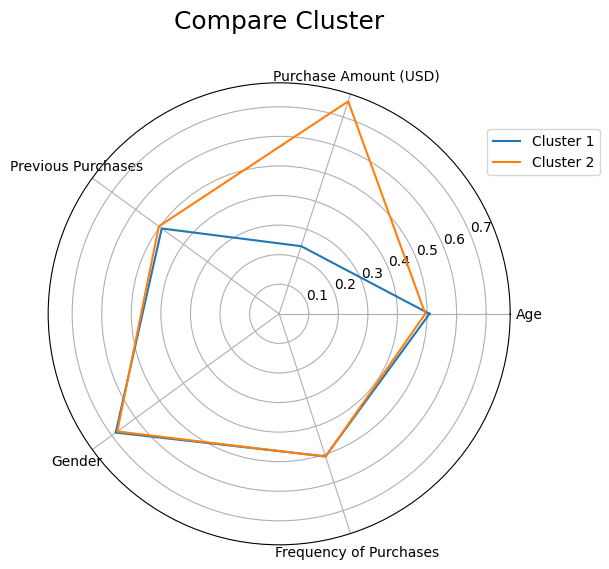

In [ ]:
#create matplotlib figure and polar plot with labels, title and legend
plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(label_placement, cluster_1_means)
plt.plot(label_placement, cluster_2_means)

#use thetagrids to place labels at the specified angles using degrees
lines, labels= plt.thetagrids(np.degrees(label_placement[:-1]), labels=categories)
plt.title('Compare Cluster', y=1.1, fontdict={'fontsize': 18})
plt.legend(labels=['Cluster 1', 'Cluster 2'], loc=(0.95, 0.8));

In [ ]:
#count the total customers for each cluster
cluster_counts = df_segment.groupby('Clusters').size()

cluster_counts

,0
Clusters,
Cluster 1,1957
Cluster 2,1943


berdasarkan hasil radar chart, jumlah pelanggan yg termasuk cluster 1 ada 1957 orang sedangkan cluster 2 terdiri dari 1943 orang

In [ ]:
cluster_means

,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
Clusters,,,,,
Cluster 1,0.508451,0.683189,0.240508,0.490922,0.506898
Cluster 2,0.494131,0.676788,0.755449,0.503062,0.507892


rata-rata dari kedua cluster mirip dari beberapa kategori namun purchase amount dari cluster 2 jauh lebih banyak dibandingkan dengan cluster 1 selain itu previous purchasesnya lebih tinggi sedikit

In [ ]:
cluster_medians = df_segment.groupby('Clusters').median()

cluster_medians

,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
Clusters,,,,,
Cluster 1,45.0,1.0,39.0,25.0,3.0
Cluster 2,43.0,1.0,81.0,26.0,3.0
